In [1]:
from qiskit import *

## NOT Gate

In [4]:
# NOT gate = X gate
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)
qc.x(q)
qc.measure(q, c)
qc.draw()

┌───┐┌─┐
q0_0: ┤ X ├┤M├
      └───┘└╥┘
c0: 1/══════╩═
            0

## AND Gate

In [9]:
# AND gate = CCX gate
qc = QuantumCircuit(3)
qc.ccx(0, 1, 2)
qc.measure_all()
qc.draw()

░ ┌─┐      
   q_0: ──■───░─┤M├──────
          │   ░ └╥┘┌─┐   
   q_1: ──■───░──╫─┤M├───
        ┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ┤ X ├─░──╫──╫─┤M├
        └───┘ ░  ║  ║ └╥┘
meas: 3/═════════╩══╩══╩═
                 0  1  2

## OR Gate

In [12]:
# OR gate = CX (to check first qubit) + CX (to check second qubit)  + CCX (to check both qubits together)
qc = QuantumCircuit(3)
qc.cx(0, 2)
qc.cx(1, 2)
qc.ccx(0, 1, 2)
qc.measure_all()
qc.draw()

░ ┌─┐      
   q_0: ──■─────────■───░─┤M├──────
          │         │   ░ └╥┘┌─┐   
   q_1: ──┼────■────■───░──╫─┤M├───
        ┌─┴─┐┌─┴─┐┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ┤ X ├┤ X ├┤ X ├─░──╫──╫─┤M├
        └───┘└───┘└───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

## XOR Gate

In [14]:
# XOR gate = OR + NOT = CX + CX (smart!)
qc = QuantumCircuit(3)
qc.cx(0, 2)
qc.cx(1, 2)
qc.measure_all()
qc.draw()

░ ┌─┐      
   q_0: ──■────────░─┤M├──────
          │        ░ └╥┘┌─┐   
   q_1: ──┼────■───░──╫─┤M├───
        ┌─┴─┐┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ┤ X ├┤ X ├─░──╫──╫─┤M├
        └───┘└───┘ ░  ║  ║ └╥┘
meas: 3/══════════════╩══╩══╩═
                      0  1  2

## NAND Gate

In [11]:
# NAND gate = AND + NOT = CCX gate + NOT gate
qc = QuantumCircuit(3)
qc.ccx(0, 1, 2)
qc.x(2)
qc.measure_all()
qc.draw()

░ ┌─┐      
   q_0: ──■────────░─┤M├──────
          │        ░ └╥┘┌─┐   
   q_1: ──■────────░──╫─┤M├───
        ┌─┴─┐┌───┐ ░  ║ └╥┘┌─┐
   q_2: ┤ X ├┤ X ├─░──╫──╫─┤M├
        └───┘└───┘ ░  ║  ║ └╥┘
meas: 3/══════════════╩══╩══╩═
                      0  1  2

## NOR Gate

In [15]:
# NOR gate = OR + NOT = CX + CX + CCX + NOT gate
qc = QuantumCircuit(3)
qc.cx(0, 2)
qc.cx(1, 2)
qc.ccx(0, 1, 2)
qc.x(2)
qc.measure_all()
qc.draw()

░ ┌─┐      
   q_0: ──■─────────■────────░─┤M├──────
          │         │        ░ └╥┘┌─┐   
   q_1: ──┼────■────■────────░──╫─┤M├───
        ┌─┴─┐┌─┴─┐┌─┴─┐┌───┐ ░  ║ └╥┘┌─┐
   q_2: ┤ X ├┤ X ├┤ X ├┤ X ├─░──╫──╫─┤M├
        └───┘└───┘└───┘└───┘ ░  ║  ║ └╥┘
meas: 3/════════════════════════╩══╩══╩═
                                0  1  2

## Half Adder

In [18]:
# Half Adder = Sum + Carry = XOR + AND
qc = QuantumCircuit(4, 2)

# XOR (Sum)
qc.cx(0, 2)
qc.cx(1, 2)

# AND (Carry)
qc.ccx(0, 1, 3)

qc.measure([2, 3], [0, 1])
qc.draw()

q_0: ──■─────────■────────
       │         │        
q_1: ──┼────■────■────────
     ┌─┴─┐┌─┴─┐  │  ┌─┐   
q_2: ┤ X ├┤ X ├──┼──┤M├───
     └───┘└───┘┌─┴─┐└╥┘┌─┐
q_3: ──────────┤ X ├─╫─┤M├
               └───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1

## Full Adder

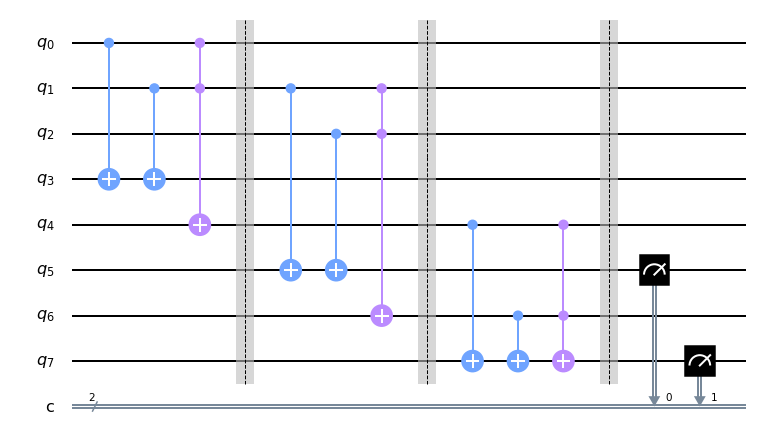

In [3]:
# Full Adder 
# Full adder using 2 half-adders!

qc = QuantumCircuit(8, 2)

# Half Adder 1 (A and B)
qc.cx(0, 3)    # 3 is sum
qc.cx(1, 3)
qc.ccx(0, 1, 4)    # 4 is carry

qc.barrier()

# Half Adder 1 (3 sum and X)
qc.cx(1, 5)    # 5 is sum and final sum
qc.cx(2, 5)
qc.ccx(1, 2, 6)    # 6 is carry

qc.barrier()

# OR on carry (4 and 6)
qc.cx(4, 7)
qc.cx(6, 7)
qc.ccx(4, 6, 7)    # 7 is final carry

qc.barrier()
qc.measure([5, 7], [0, 1])
qc.draw('mpl')

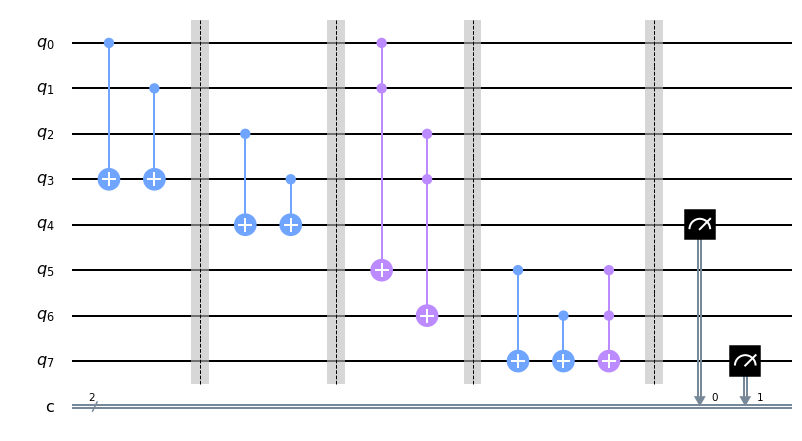

In [10]:
# Full Adder traditional

qc = QuantumCircuit(8, 2)

# XOR (A and B)
qc.cx(0, 3)
qc.cx(1, 3)

qc.barrier()

# XOR (3 and X)
qc.cx(2, 4)
qc.cx(3, 4)    # 4 is final sum

qc.barrier()

# AND (A and B)
qc.ccx(0, 1, 5)

# AND (3 and X)
qc.ccx(2, 3, 6)

qc.barrier()

# OR (5 and 6)
qc.cx(5, 7)
qc.cx(6, 7)
qc.ccx(5, 6, 7)    # 7 is final carry

qc.barrier()

qc.measure([4, 7], [0, 1])
qc.draw('mpl')